In [1]:
import numpy as np
import pylab
import healpy as hp
import matplotlib.pyplot as py

In [2]:
from fgbuster.observation_helpers import get_instrument,get_noise_realization,get_sky,get_observation

In [3]:
def D_ell(C_ell):
    # Determine the length of the input power spectrum
    n_ell = len(C_ell)

    # Create an array of zeros to store the scale invariant power spectrum
    D_ell = np.zeros(n_ell)

    # Compute the scale invariant power spectrum using vectorized operations
    # Vectorized operations eliminate the need for a for loop, improving performance

    # Compute the product of each element with the next element using np.arange(n_ell) * (np.arange(n_ell) + 1)
    # Multiply the above result by C_ell to perform element-wise multiplication with the corresponding elements in C_ell
    # Divide the above result by np.pi to perform element-wise division by pi
    D_ell = np.arange(n_ell) * (np.arange(n_ell) + 1) * C_ell / np.pi

    # Return the computed scale invariant power spectrum
    return D_ell

In [4]:
amin2rad = np.pi/(60.*180.)

# Simulating Sky

In [5]:
NSIDE = 512
NSIDE_decon = 128
# lmax = 3*NSIDE-1  # Maximum ell value based on the given NSIDE value
lmax = 2*NSIDE
lmax_decon = 2*NSIDE_decon
sky_d0s0 = get_sky(NSIDE, 'd0s0')  # Get the sky map using the specified NSIDE and sky type 'd0s0'

instrument = get_instrument('LiteBIRD')  # Get the instrument information for 'LiteBIRD'
freq_maps_d0s0 = get_observation(instrument, sky_d0s0)
freq_maps_d0s0 = np.zeros(freq_maps_d0s0.shape)
# Obtain the frequency maps for the given instrument and sky map.
# freq_maps_d0s0 is a 3D array containing the observed maps for each frequency channel.

num_freq, ncomp, npix = freq_maps_d0s0.shape
# Retrieve the dimensions of the freq_maps_d0s0 array.
# - num_freq represents the number of frequency channels.
# - ncomp represents the number of components in the observed map.
# - npix represents the number of pixels in the observed map.

/home/julientang2001/fgbuster/fgbuster/observation_helpers.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  return df.dropna(1, 'all')


In [6]:
cl_CMB_th = hp.read_cl("/home/julientang2001/Stage3A/Cls_Planck2018_lensed_scalar.fits")

cl_CMB_crop_th = cl_CMB_th[:,:lmax+1]

# np.random.seed(0)
map_CMB = hp.synfast(cl_CMB_th,nside=NSIDE,new = True)


print(map_CMB.shape)
cl_CMB6 = hp.anafast(map_CMB,lmax=lmax,alm = False)
cl_CMB = cl_CMB6[:4]
print(cl_CMB.shape)

(3, 3145728)
(4, 1025)


In [7]:
alm_CMB = hp.map2alm(map_CMB,lmax)


## Compare alm2map with nside_out and ud_grade

In [8]:
map_CMB_dg1 = hp.alm2map(alm_CMB,nside=NSIDE_decon)
map_CMB_dg2 = hp.ud_grade(map_CMB,nside_out=NSIDE_decon)
l_arr = np.arange(lmax_decon+1)
Cl_CMB1 = hp.anafast(map_CMB_dg1,lmax=lmax_decon)
Cl_CMB2 = hp.anafast(map_CMB_dg2,lmax=lmax_decon)
Cl_CMB3 = hp.anafast(map_CMB,lmax=lmax)

In [9]:
print(cl_CMB_crop_th.shape)

(4, 1025)


/var/tmp/pbs.172083.idark/ipykernel_168860/471569968.py:6: RuntimeWarning: invalid value encountered in divide
  py.plot(l_arr,Cl_CMB1[2]/cl_CMB_crop_th[2,:lmax_decon+1],'m--',label = r'$\frac{red}{green}$')


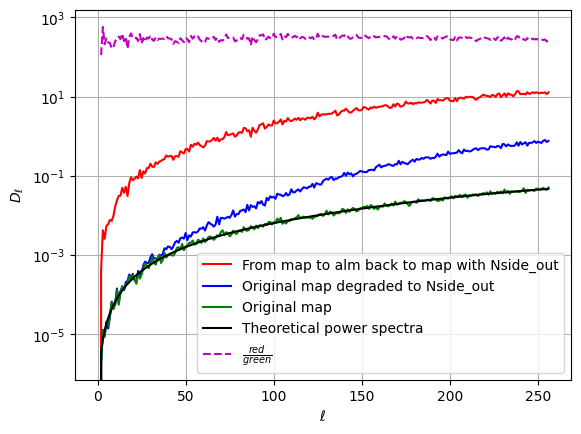

In [10]:

py.plot(l_arr,D_ell(Cl_CMB1[2]),'r',label = 'From map to alm back to map with Nside_out')
py.plot(l_arr,D_ell(Cl_CMB2[2]),'b',label = 'Original map degraded to Nside_out')
# py.plot(l_arr,hp.anafast(map_CMB,lmax=lmax_decon)[2],'g')
py.plot(l_arr,D_ell(Cl_CMB3[2,:lmax_decon+1]),'g',label = 'Original map')
py.plot(l_arr,D_ell(cl_CMB_crop_th[2,:lmax_decon+1]),'k',label = 'Theoretical power spectra')
py.plot(l_arr,Cl_CMB1[2]/cl_CMB_crop_th[2,:lmax_decon+1],'m--',label = r'$\frac{red}{green}$')
py.grid()
py.xlabel(r'$\ell$')
py.ylabel(r'$D_{\ell}$')
py.legend(loc='best')
py.yscale('log')